# Kümeleme/Bölütleme (Clustering)

# K-Means Kodlaması

[[ 63915.27777778   6140.625     ]
 [109905.55555556   7325.69444444]
 [ 23539.13043478   5272.01086957]]
[242389902746.875, 69083288306.74911, 37348094671.27114, 19660743423.029774, 12911353632.710129, 8631933632.939518, 6681057888.771544, 5270111379.56871, 4247077193.8315444]


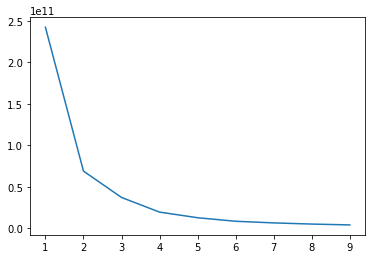

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler=pd.read_csv("musteriler.csv")

X=veriler.iloc[:,3:].values

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)
print(kmeans.cluster_centers_)# merkezlerinin nerede oluştugu
#k için optimum deger
sonuclar=[]
for i in range(1,10):
    kmeans =KMeans(n_clusters=i, init="k-means++",random_state=123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)#wss degerlerimiz (inertia)
print(sonuclar)
plt.plot(range(1,10),sonuclar)

# Hiyerarşik Bölütleme (Hierarchical Clustering)

### Agglomerative (Algoritma adımları) 

[[ 22069.41176471   5320.88235294]
 [104386.95652174   7289.13043478]
 [ 58643.47826087   5844.92753623]]
kmeans: [1 1 1 0 0 0 0 1 0 3 3 1 3 0 1 2 1 0 1 1 0 0 1 3 2 3 0 1 0 3 0 3 3 1 3 3 3
 0 3 2 2 0 1 0 0 3 3 3 3 2 0 1 2 2 1 1 0 1 3 1 2 1 3 0 3 0 3 1 3 0 1 1 1 1
 0 0 2 1 3 0 0 0 3 3 2 1 1 3 0 0 1 0 2 3 0 3 0 1 0 0 3 2 1 0 0 1 1 3 3 2 2
 1 1 1 1 3 0 1 3 3 0 3 1 1 1 3 0 0 2 0 0 3 3 3 3 0 3 3 1 3 1 0 3 3 1 3 3 3
 3 0 3 3 1 0 3 2 0 3 2 0 3 3 0 3 0 3 3 1 0 0 1 0 0 3 1 0 0 3 2 3 3 1 3 2 1
 2 0 0 3 0 3 0 3 1 0 1 1 3 3 3]


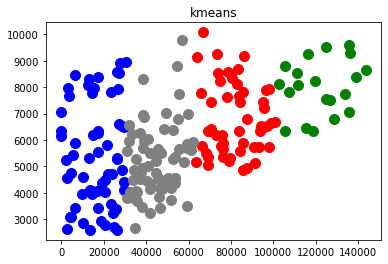

hc: [0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


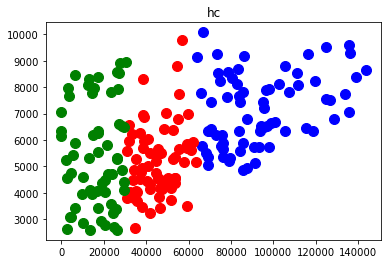

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler=pd.read_csv("musteriler.csv")

X=veriler.iloc[:,3:].values

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, init="k-means++")
kmeans.fit(X)
print(kmeans.cluster_centers_)# merkezlerinin nerede oluştugu
#k için optimum deger
sonuclar=[]
for i in range(1,10):
    kmeans =KMeans(n_clusters=i, init="k-means++",random_state=123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)#wss degerlerimiz (inertia)

kmeans =KMeans(n_clusters=4, init="k-means++",random_state=123)
Y_tahmin=kmeans.fit_predict(X)
print("kmeans:",Y_tahmin)
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100,c="blue")
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100,c="red")
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100,c="green")
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100,c="grey")
plt.title("kmeans")
plt.show()
#HC
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage="ward")
Y_tahmin=ac.fit_predict(X)
print("hc:",Y_tahmin)
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100,c="blue")
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100,c="red")
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100,c="green")
plt.title("hc")
plt.show()

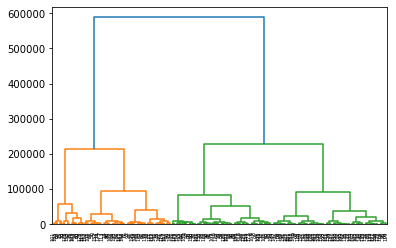

In [3]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method="ward"))
plt.show()

# Bİrliktelik Kural Öğrenimi (Association Rule Mining)

### Apriori Algoritmasının Kodlanması 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

veriler=pd.read_csv("sepet.csv",header=None)
t=[]
for i in range(0,7501):
    t.append([str(veriler.values[i,j]) for j in range (0,20)])

from apyori import apriori
kurallar=apriori(t,min_support=0.01, min_confidence=0.2,min_lift=3,min_length=2)
print(list(kurallar))



[RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]), RelationRecord(items=frozenset({'nan', 'herb & pepper', 'ground beef'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'nan', 'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)])]
